# XGBoost

Going to try and use **XGBoost** on the *heart dataset* to see if I can predict if someone will might have a heart disease.  Wish me luck. 

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

We need to inspect the data and see what the columns mean and if they need to be reformatted.

**age**:
* age in years

**sex**:
* (1 = male; 0 = female)

**cp**:
* chest pain type

**trestbps**:
* resting blood pressure (in mm Hg on admission to the hospital)

**chol**:
* serum cholestoral in mg/dl

**fbs**:
* fasting blood sugar &gt; 120 mg/dl 
    * (1 = true; 0 = false)

**restecg**:
* resting electrocardiographic results

**thalach**:
* maximum heart rate achieved

**exang**:
* exercise induced angina 
    * 1 = yes; 0 = no

**oldpeak**:
* ST depression induced by exercise relative to rest

**slope**:
* the slope of the peak exercise ST segment

**ca**:
* number of major vessels (0-3) colored by flourosopy

**thal**:
* 3 = normal
* 6 = fixed defect
* 7 = reversable defect

**target**:
* 1 or 0

In [5]:
df = pd.read_csv('~/Downloads/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


To format this correctly, it looks like the columns that I will leave are
* sex
* fbs
* exang

These are the only variables that only have *0's* and *1's*

It might be tricky because **cp** has values of *0*, *1*, *2*, and *3*.  If we leave it how it is, that implies that certain chest pain types are more closely related with others.

The same thing goes for **slope** and **thal**.  I do not know if numbers that are closer togther are closer related to numbers that are farther appart.  I think I will make them into characters to avoid this issue.  If the accuracy sucks, then I might want to come back to this.

I want to now inspect all the columns and see if there are some things that are unique or interesting.  First I am going to go over each of the columns and use `unique` to see how many unique values there are,

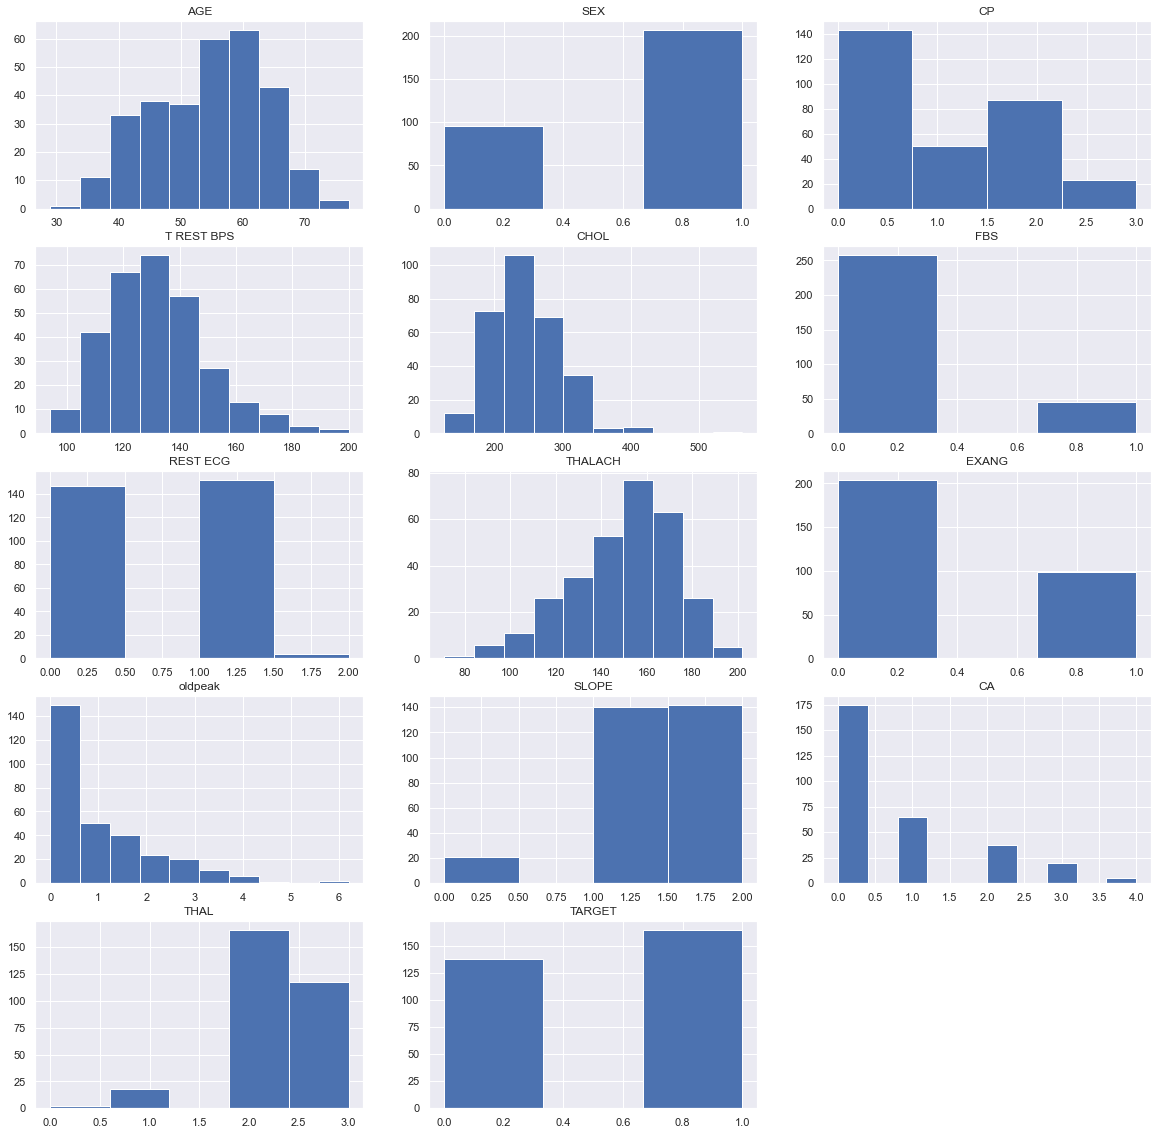

In [6]:
sns.set()
plt.figure(figsize=(20, 20))

# The subplot(i, j, k)
# i is the number of rows to have
# j is the number of columns to have 
# k is the plot number
# So subplot(3,3,1) would be a 3x3 matrix of plots and the first (top left) on would be the plot below this subplot

plt.subplot(5, 3, 1)
plt.hist(df['age'])
plt.title('AGE')

plt.subplot(5, 3, 2)
plt.hist(df['sex'], 3)
plt.title('SEX')

plt.subplot(5, 3, 3)
plt.hist(df['cp'], 4)
plt.title('CP')

plt.subplot(5, 3, 4)
plt.hist(df['trestbps'])
plt.title('T REST BPS')

plt.subplot(5, 3, 5)
plt.hist(df['chol'])
plt.title('CHOL')

plt.subplot(5, 3, 6)
plt.hist(df['fbs'], 3)
plt.title('FBS')

plt.subplot(5, 3, 7)
plt.hist(df['restecg'], 4)
plt.title('REST ECG')

plt.subplot(5, 3, 8)
plt.hist(df['thalach'])
plt.title('THALACH')

plt.subplot(5, 3, 9)
plt.hist(df['exang'], 3)
plt.title('EXANG')

plt.subplot(5, 3, 10)
plt.hist(df['oldpeak'])
plt.title('oldpeak')

plt.subplot(5, 3, 11)
plt.hist(df['slope'], 4)
plt.title('SLOPE')

plt.subplot(5, 3, 12)
plt.hist(df['ca'])
plt.title('CA')

plt.subplot(5, 3, 13)
plt.hist(df['thal'], 5)
plt.title('THAL')

plt.subplot(5, 3, 14)
plt.hist(df['target'], 3)
plt.title('TARGET')

plt.show()

In [ ]:
df.head()
# print(df['age'].unique())
print(df['sex'].unique()) 
# print(df['trestbps'].unique())
# print(df['chol'].unique())
print(df['fbs'].unique()) 
print(df['restecg'].unique())
# print(df['thalach'].unique())
print(df['exang'].unique())
# print(df['oldpeak'].unique())
print(df['slope'].unique())
print(df['ca'].unique())
print(df['thal'].unique())
print(df['target'].unique())

In [7]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object

I will make `cp` and `thal` characters to avoid having the numbers be related

In [8]:
df['cp'] = df['cp'].replace(3, 'Type_3').replace(2, 'Type_2').replace(1, 'Type_1').replace(0, 'Type_0')
df['thal'] = df['thal'].replace(3, 'Normal').replace(2, 'Fixed_defect').replace(1, 'Reversable_defect').replace(0, '0')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,Type_3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,Reversable_defect,1.0
1,37.0,1.0,Type_2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,Fixed_defect,1.0
2,41.0,0.0,Type_1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,Fixed_defect,1.0
3,56.0,1.0,Type_1,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,Fixed_defect,1.0
4,57.0,0.0,Type_0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,Fixed_defect,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,Type_0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,Normal,0.0
299,45.0,1.0,Type_3,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,Normal,0.0
300,68.0,1.0,Type_0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,Normal,0.0
301,57.0,1.0,Type_0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,Normal,0.0


Now the columns that I need to use **one-hot enconding** on are:
* sex
* cp
* fbs
* restecg
* exang
* thal

In [16]:
df[df['restecg'] == 2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
144,76.0,0.0,Type_2,140.0,197.0,0.0,2.0,116.0,0.0,1.1,1.0,0.0,Fixed_defect,1.0
266,55.0,0.0,Type_0,180.0,327.0,0.0,2.0,117.0,1.0,3.4,1.0,0.0,Fixed_defect,0.0
289,55.0,0.0,Type_0,128.0,205.0,0.0,2.0,130.0,1.0,2.0,1.0,1.0,Normal,0.0
291,58.0,1.0,Type_0,114.0,318.0,0.0,2.0,140.0,0.0,4.4,0.0,3.0,Reversable_defect,0.0


Before I do that, I need to get my dependent and independent variables:

In [19]:
X = df.drop('target', axis=1).copy()
y = df['target'][:]

In [20]:
y.unique()

array([1., 0.])

### One-Hot Encoding

Takes data that is categorical and makes it into a format that xgboost can use.  XGBoost does not nativly take string values. 

There are two main popular ways:
1. `ColumnTranssformer()`
2. `get_dummies()`

We will use `get_dummies()`

In [21]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_Type_0,cp_Type_1,cp_Type_2,cp_Type_3
0,63.0,1.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,Reversable_defect,0,0,0,1
1,37.0,1.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,Fixed_defect,0,0,1,0
2,41.0,0.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,Fixed_defect,0,1,0,0
3,56.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,Fixed_defect,0,1,0,0
4,57.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,Fixed_defect,1,0,0,0


In [23]:
X_encoded = pd.get_dummies(X, columns=[
    'sex',
    'cp',
    'fbs',
    'restecg',
    'exang',
    'thal'
])

X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex_0.0,sex_1.0,cp_Type_0,...,fbs_1.0,restecg_0.0,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,thal_0,thal_Fixed_defect,thal_Normal,thal_Reversable_defect
0,63.0,145.0,233.0,150.0,2.3,0.0,0.0,0,1,0,...,1,1,0,0,1,0,0,0,0,1
1,37.0,130.0,250.0,187.0,3.5,0.0,0.0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,41.0,130.0,204.0,172.0,1.4,2.0,0.0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,56.0,120.0,236.0,178.0,0.8,2.0,0.0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,57.0,120.0,354.0,163.0,0.6,2.0,0.0,1,0,1,...,0,0,1,0,0,1,0,1,0,0


In [24]:
np.mean(y)

0.5445544554455446

I don't think this data is too unbalanced just 4% off.  I'm not sure if there is a limit that makes your data unbalanced

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, stratify=y)

In [26]:
print(np.mean(y_train))
print(np.mean(y_test))

0.5462555066079295
0.5394736842105263


Nice, it did work as expected.

Now we are ready to build our **XGBoost** model.  

**NOTE**: Instead of determining the optimal number of trees with cross validation, we will use **early stopping** to stop building trees when they no longer imporve the situation

In [27]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.853268
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.853064
[2]	validation_0-aucpr:0.87699
[3]	validation_0-aucpr:0.876222
[4]	validation_0-aucpr:0.883417
[5]	validation_0-aucpr:0.88498
[6]	validation_0-aucpr:0.883297
[7]	validation_0-aucpr:0.885317
[8]	validation_0-aucpr:0.910527
[9]	validation_0-aucpr:0.908253
[10]	validation_0-aucpr:0.908268
[11]	validation_0-aucpr:0.913658
[12]	validation_0-aucpr:0.915941
[13]	validation_0-aucpr:0.915743
[14]	validation_0-aucpr:0.918538
[15]	validation_0-aucpr:0.919378
[16]	validation_0-aucpr:0.922679
[17]	validation_0-aucpr:0.922816
[18]	validation_0-aucpr:0.924144
[19]	validation_0-aucpr:0.923146
[20]	validation_0-aucpr:0.925817
[21]	validation_0-aucpr:0.926391
[22]	validation_0-aucpr:0.92715
[23]	validation_0-aucpr:0.927499
[24]	validation_0-aucpr:0.92709
[25]	validation_0-aucpr:0.925027
[26]	validation_0-aucpr:0.924232
[27]	validation_0-aucpr:0.926994
[28]	validation_0-aucpr:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)

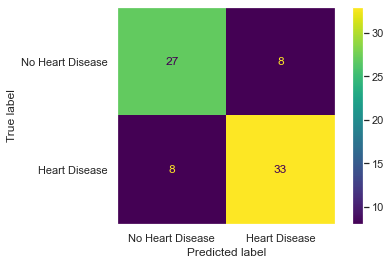

In [39]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Heart Disease', 'Heart Disease'])
plt.grid(False)


Lets see if we can bump up the accuracy at all

# Optimize Parameters using Cross Validation and GridSearch()

**XGBoost** has a lot of *hyperparameters*, parameters that we have to manual configure and are not determined by **XGBoost** itself, including `max_depth` the maximum tree depth, `learning_rate`, the learning rate, or "eta", `gamma`, the parameter that encourages pruning, and `reg_lambda`, the regularization parameter lambda.  So let's try to find the optimal paramter values for these hyperparameters in hopes that we can improve the accuracy with the **Testing Dataset**

**NOTE:** Since we have many hyperparameters to optimize, we will use `GridSearchCV()`.  We specify a bunch of potential values for the hyperparameters and `GridSearchCV` tests all possible combinations of parameters for us.

In [87]:
## Note: when the data are imbalanced, the XGBoost manual says..
## If you care only about the overall performance metric (AUC) of your prediction
##     * Balance the positive and negative weights via scale_pos_weight
##     * Use AUC for evaluation

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5]
}
# {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 1.0, 'scale_pos_weight': 5}

param_grid = {
    'max_depth': [1, 2, 3],
    'learning_rate': [0.1, 0.15, 0.2],
    'gamma': [0],
    'reg_lambda': [1.0],
    'scale_pos_weight': [5, 7, 9]
}
# {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 1, 'reg_lambda': 1.0, 'scale_pos_weight': 7}


param_grid = {
    'max_depth': [0,1],
    'learning_rate': [0.2, 0.22, 0.25],
    'gamma': [0],
    'reg_lambda': [2,3,4],
    'scale_pos_weight': [7]
}
# {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 1, 'reg_lambda': 1.0, 'scale_pos_weight': 7}
# These will be the params we use to see if it helps

optimal_params = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic',
                              subsample=0.9,
                              colsample_bytree=0.5),
            param_grid=param_grid,
            scoring='roc_auc',
            verbose=0,
            n_jobs=10,
            cv=3
)

optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_metric='auc',
                  eval_set=[(X_test, y_test)],
                  verbose=False)

print(optimal_params.best_params_)

{'gamma': 0, 'learning_rate': 0.25, 'max_depth': 1, 'reg_lambda': 3, 'scale_pos_weight': 7}


So, after testing all possible combinations of the potential parameter values with **Cross Validation**, we see that we should set `gamma=0`, `learn_rate=0.2`, `max_depth=1`, `reg_lambda=1.0`, and `scale_pos_weight=7`

Now that we have the ideal parameter valeus, we can build the final **XGBoost** model:

In [102]:
clf_xgb = xgb.XGBClassifier(seed=42,
                            objective = 'binary:logistic',
                           gamma = 0,
                           reg_lambda=3,
                           learning_rate=0.22,
                           max_depth=1,
                           scale_pos_weight=7,
                           subsample=0.9,
                           colsample_bytree=0.7)
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='aucpr',
           eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.689012
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.705157
[2]	validation_0-aucpr:0.725645
[3]	validation_0-aucpr:0.801818
[4]	validation_0-aucpr:0.799933
[5]	validation_0-aucpr:0.803228
[6]	validation_0-aucpr:0.868307
[7]	validation_0-aucpr:0.871808
[8]	validation_0-aucpr:0.885834
[9]	validation_0-aucpr:0.89143
[10]	validation_0-aucpr:0.887787
[11]	validation_0-aucpr:0.886663
[12]	validation_0-aucpr:0.88556
[13]	validation_0-aucpr:0.88386
[14]	validation_0-aucpr:0.880272
[15]	validation_0-aucpr:0.888122
[16]	validation_0-aucpr:0.890803
[17]	validation_0-aucpr:0.911174
[18]	validation_0-aucpr:0.910782
[19]	validation_0-aucpr:0.908492
[20]	validation_0-aucpr:0.913072
[21]	validation_0-aucpr:0.912349
[22]	validation_0-aucpr:0.913347
[23]	validation_0-aucpr:0.918039
[24]	validation_0-aucpr:0.914813
[25]	validation_0-aucpr:0.916879
[26]	validation_0-aucpr:0.91934
[27]	validation_0-aucpr:0.920068
[28]	validation_0-aucpr:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.22, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=3, scale_pos_weight=7, seed=42,
              silent=None, subsample=0.9, verbosity=1)

Now let's draw another confustion matrix to see if **XGBoost** works better with the optimized parameters

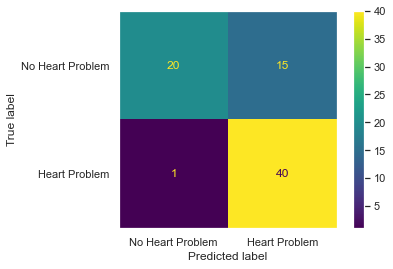

In [103]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No Heart Problem', 'Heart Problem'])
plt.grid(False)

It did very bad on the people who didn't have a heart problem, but did really well on the people who did actually have a hear problem